# Predicting Diamond Prices
## Phase 1: Data Preparation & Visualisation

#### Group Number: Group 57

#### Name(s) & ID(s) of Group Members: 
- Eddie Ton (s3948609)
- Jabbar Baloghlan (s3890406)
- Tyler Xia (s3945694)

## Table of Contents
* [Introduction](#Introduction) 
  + [Dataset Source](#Dataset-Source)
  + [Dataset Details](#Dataset-Details)
  + [Dataset Features](#Dataset-Features)
  + [Target Feature](#Target-Feature)
* [Goals and Objectives](#Goals-and-Objectives)
* [Data Cleaning and Preprocessing](#Data-Cleaning-and-Preprocessing)
* [Data Exploration and Visualisation](#Data-Exploration-and-Visualisation)
* [Summary and Conclusion](#Summary-and-Conclusion)
* [References](#References)

## Introduction

### Dataset Source

The Diamond dataset used in study was sourced from Kaggle (Shivam Agrawal, 2021). This dataset contains various details and properties of diamonds based on the Tiffany & Co's snapshot pricelist from 2017.

### Dataset Details

The dataset contains information about the carat, size, quality, colour and the price of a diamond. It also includes information on the depth, the height of a diamond from the middle to its tip. The table, which is the largest surface area on the diamond which is commonly on the top. As well as, the width, length, and height of a diamond. 

This dataset has 10 features in total and 53941 observations. Diamonds with no price information or missing values have been removed from the dataset.

In [2]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import io
import requests

pd.set_option('display.max_columns', None) 

###
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("seaborn")
###

In [3]:
# name of the dataset to be imported from our GitHub account
df_name = 'diamonds.csv'
df_url = 'https://raw.githubusercontent.com/Jobi060704/math_files/main/' + df_name
url_content = requests.get(df_url, verify=False).content
diamond_df = pd.read_csv(io.StringIO(url_content.decode('utf-8')))

In [4]:
new_diamond_df = diamond_df.drop(columns=diamond_df.columns[0])
new_diamond_df.sample(10, random_state=99)

,Carat,Cut,Color,Clarity,Depth,Table,Price,X,Y,Z
42653,0.40,Premium,G,IF,60.8,58.0,1333,4.73,4.77,2.89
4069,0.31,Very Good,D,SI1,63.0,55.0,571,4.32,4.34,2.73
27580,1.60,Ideal,F,VS2,62.0,55.0,18421,7.49,7.54,4.66
33605,0.31,Good,D,SI2,63.1,54.0,462,4.33,4.38,2.75
34415,0.30,Ideal,G,IF,61.2,57.0,863,4.35,4.38,2.67
46932,0.52,Premium,G,VS1,62.4,60.0,1815,5.12,5.11,3.19
52243,0.80,Very Good,J,VS1,62.7,58.0,2487,5.91,5.95,3.72
38855,0.40,Ideal,G,VVS2,62.4,56.0,1050,4.74,4.72,2.95
38362,0.33,Ideal,D,VVS2,61.1,56.0,1021,4.46,4.44,2.72
20258,1.72,Ideal,J,SI1,62.0,57.0,8688,7.66,7.62,4.74


### Dataset Features

The features in our dataset are described in the table below. These descriptions are taken from the Kaggle data source.

In [5]:
from tabulate import tabulate

table = [['Name','Data Type','Units','Description'],
        ['Carat','Numeric','Carat','Weight of the diamond'],
        ['Cut','Ordinal Categorical','NA','Quality of the cut:\
            \n- Fair\
            \n- Good\
            \n- Very Good\
            \n- Premium\
            \n- Ideal'],
        ['Color','Ordinal Categorical','NA','Diamond colour, from J (worst) to D (best)'],
        ['Clarity','Ordinal Categorical','NA','A measurement of the clarity of a diamond:\
            \n- I1 (worst)\
            \n- SI2\
            \n- SI1\
            \n- VS2\
            \n- VS1\
            \n- VVS2\
            \n- VVS1\
            \n- IF (best)'],
        ['Depth','Numeric','Percent','Total depth percentage = z / mean(x, y) = 2 * z / (x + y) '],
        ['Table','Numeric','Percent','Percentage of a diamonds average diameter\nof the top section relative to its total diameter'],
        ['Price','Numeric','USD','The price of the diamond'],
        ['X','Numeric','Millimeters','Length of a diamond'],
        ['Y','Numeric','Millimeters','Width of a diamond'],
        ['Z','Numeric','Millimeters','Depth of a diamond']]

print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

╒═════════╤═════════════════════╤═════════════╤═══════════════════════════════════════════════════════════╕
│ Name    │ Data Type           │ Units       │ Description                                               │
╞═════════╪═════════════════════╪═════════════╪═══════════════════════════════════════════════════════════╡
│ Carat   │ Numeric             │ Carat       │ Weight of the diamond                                     │
├─────────┼─────────────────────┼─────────────┼───────────────────────────────────────────────────────────┤
│ Cut     │ Ordinal Categorical │ NA          │ Quality of the cut:                                       │
│         │                     │             │ - Fair                                                    │
│         │                     │             │ - Good                                                    │
│         │                     │             │ - Very Good                                               │
│         │                 

### Target Feature

For this project, the target feature in this dataset will be the diamond price in US dollars. That is, the price of diamonds will be predicted based on the explanatory/ descriptive variables. 

## Goals and Objectives

Diamond prices have a very complex calculation system. A model that could acurately predict/set diamond prices is absolutely a requirement. For instance, a jeweler would need such a model to correctly state the properties of the diamonds after the work has been done. Similarly, a store selling diamonds could use such a model to determine the price to sell the diamond at. 

Thus, the main objective of this project is two-fold: (1) predict the price of diamonds based on the publically available properties of diamonds, and (2) which features seem to be the best predictors of the diamond sale price. A secondary objective is to perform some exploratory data analysis by basic descriptive statistics & data visualisation plots to gain some insight into the patterns and relationships existing in the data subsequent to some data cleaning & preprocessing, which is the subject of this Phase 1 report.

At this point, we make the important assumption that rows in our dataset are not correlated. That is, we assume that diamond prices are independent of one another in this dataset. Of course, this is not a very realistic assumption, however, this assumption allows us to circumvent time series aspects of the underlying dynamics of diamond prices and also to resort to rather classical predictive models such as multiple linear regression.

## Data Cleaning and Preprocessing

In this section, we describe the data cleaning and preprocessing steps undertaken for this project.

### Data Cleaning Steps

*   Drop irrelevant features in our dataset
*   Check and rename/ modify some column names
*   Check for missing values
*   Remove all the rows with missing values 
*   Random sampling of the dataset for 5000 rows

#### Taking care of outliers and unusual observations

For numeric features based on the measurement of the real object of a diamond, the observation of the numeric features cannot be equal to zero or any negative values. Additionally, table and depth features must be greater than zero. Since, the features are a percentage between two positive variables.

The table below are a sample of the observations that fulfill these conditions. All 20 of the problematic observations have been dropped from the dataset.

In [6]:
no_outlier_df = new_diamond_df[(new_diamond_df['Carat'] > 0) & (new_diamond_df['Depth'] > 0) & (new_diamond_df['Table'] > 0) & (new_diamond_df['X'] > 0) & (new_diamond_df['Y'] > 0) & (new_diamond_df['Z'] > 0)]
no_outlier_df.sample(10, random_state=99)

,Carat,Cut,Color,Clarity,Depth,Table,Price,X,Y,Z
49849,0.56,Ideal,D,VS1,62.6,59.0,2170,5.24,5.31,3.30
9905,1.11,Premium,H,VS1,62.3,57.0,4687,6.67,6.62,4.14
47696,0.52,Ideal,E,VS1,60.0,56.0,1883,5.25,5.29,3.16
11721,0.34,Ideal,E,SI1,61.8,56.0,596,4.45,4.48,2.76
22755,2.01,Fair,H,SI2,66.7,56.0,10772,7.80,7.76,5.19
29220,0.34,Ideal,I,IF,61.3,55.0,695,4.52,4.55,2.78
53886,0.70,Good,D,VS2,58.0,62.0,2749,5.78,5.87,3.38
6939,1.00,Fair,E,SI1,66.3,62.0,4140,6.27,6.06,4.09
48868,0.78,Very Good,J,SI1,59.4,62.0,2035,6.01,6.05,3.58
10061,0.35,Good,F,SI2,63.8,56.0,591,4.48,4.45,2.85


For categorical features, an outlier is defined as a value that doesn't fit the previously defined observations of a feature. There are no problematic observations. Thus, requires no changes to the dataset.

### Encoding categorical descriptive features

To make the categorical features readable to a machine. The technique of integer encoding for all categorical features, since they all contain an obvious order to the unique observations. In doing so, the values in observations will fit the theme. Where zero represents the relatively worst value for the feature, and the highest number represent the best value for the feature.

The table below is a sample of the observations that changed to fit these conditions.

In [15]:
cleanup =  {"Cut": {"Fair": 0, "Good": 1, "Very Good": 2, "Premium": 3, "Ideal": 4},
            "Color": {"D": 0, "E": 1, "F": 2, "G": 3, "H": 4, "I": 5, "J":6},
            "Clarity": {"I1": 0, "SI2": 1, "SI1": 2, "VS2": 3, "VS1": 4, "VVS2": 5, "VVS1": 6, "IF": 7}}
IE_diamond_df = no_outlier_df.replace(cleanup)

In [16]:
IE_diamond_df.sample(10, random_state=99)

,Carat,Cut,Color,Clarity,Depth,Table,Price,X,Y,Z
49849,0.56,4,0,4,62.6,59.0,2170,5.24,5.31,3.30
9905,1.11,3,4,4,62.3,57.0,4687,6.67,6.62,4.14
47696,0.52,4,1,4,60.0,56.0,1883,5.25,5.29,3.16
11721,0.34,4,1,2,61.8,56.0,596,4.45,4.48,2.76
22755,2.01,0,4,1,66.7,56.0,10772,7.80,7.76,5.19
29220,0.34,4,5,7,61.3,55.0,695,4.52,4.55,2.78
53886,0.70,1,0,3,58.0,62.0,2749,5.78,5.87,3.38
6939,1.00,0,1,2,66.3,62.0,4140,6.27,6.06,4.09
48868,0.78,2,6,2,59.4,62.0,2035,6.01,6.05,3.58
10061,0.35,1,2,1,63.8,56.0,591,4.48,4.45,2.85


In [19]:
IE_diamond_df["Cut"].()

1.1165789562471964

## Data Exploration and Visualisation

Our dataset is now considered to be clean and we are ready to start visualising and explore each of the features.

### Univariate Visualisation

#### Distribution Plot of Color

We count the Color gradients to see which color has the highest count in diamonds. As we can see in Figure 1, the I gradient is the most abundant variation compared to others.

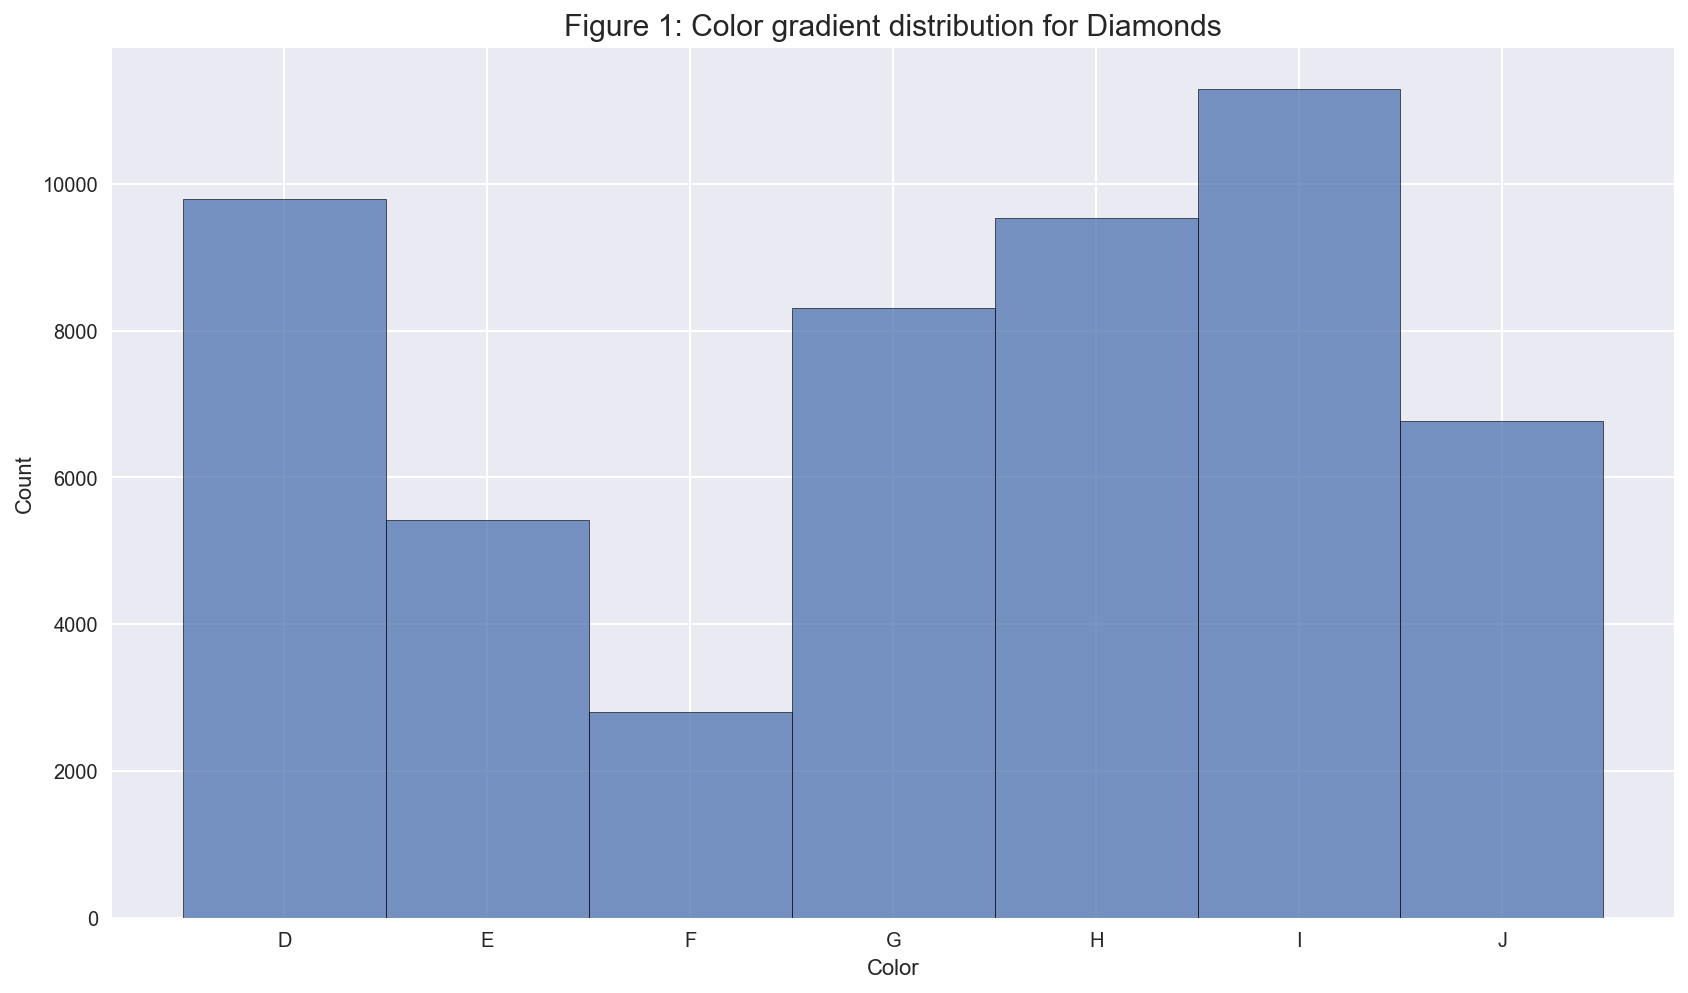

In [8]:
plt.figure(figsize = (14,8))
fig = sns.histplot(new_diamond_df['Color'], discrete=True)
fig.set_xticks(new_diamond_df['Color'].unique())
fig.set_xticklabels(['D','E','F','G','H','I','J'])
fig = plt.title('Figure 1: Color gradient distribution for Diamonds', fontsize = 15)
plt.show()

#### Distribution Plot of Cut

We count the Cut grades to see which cut has the highest count in diamonds. As we can see in Figure 1, the the 'Fair' cut grade is the most abundant variation compared to others.

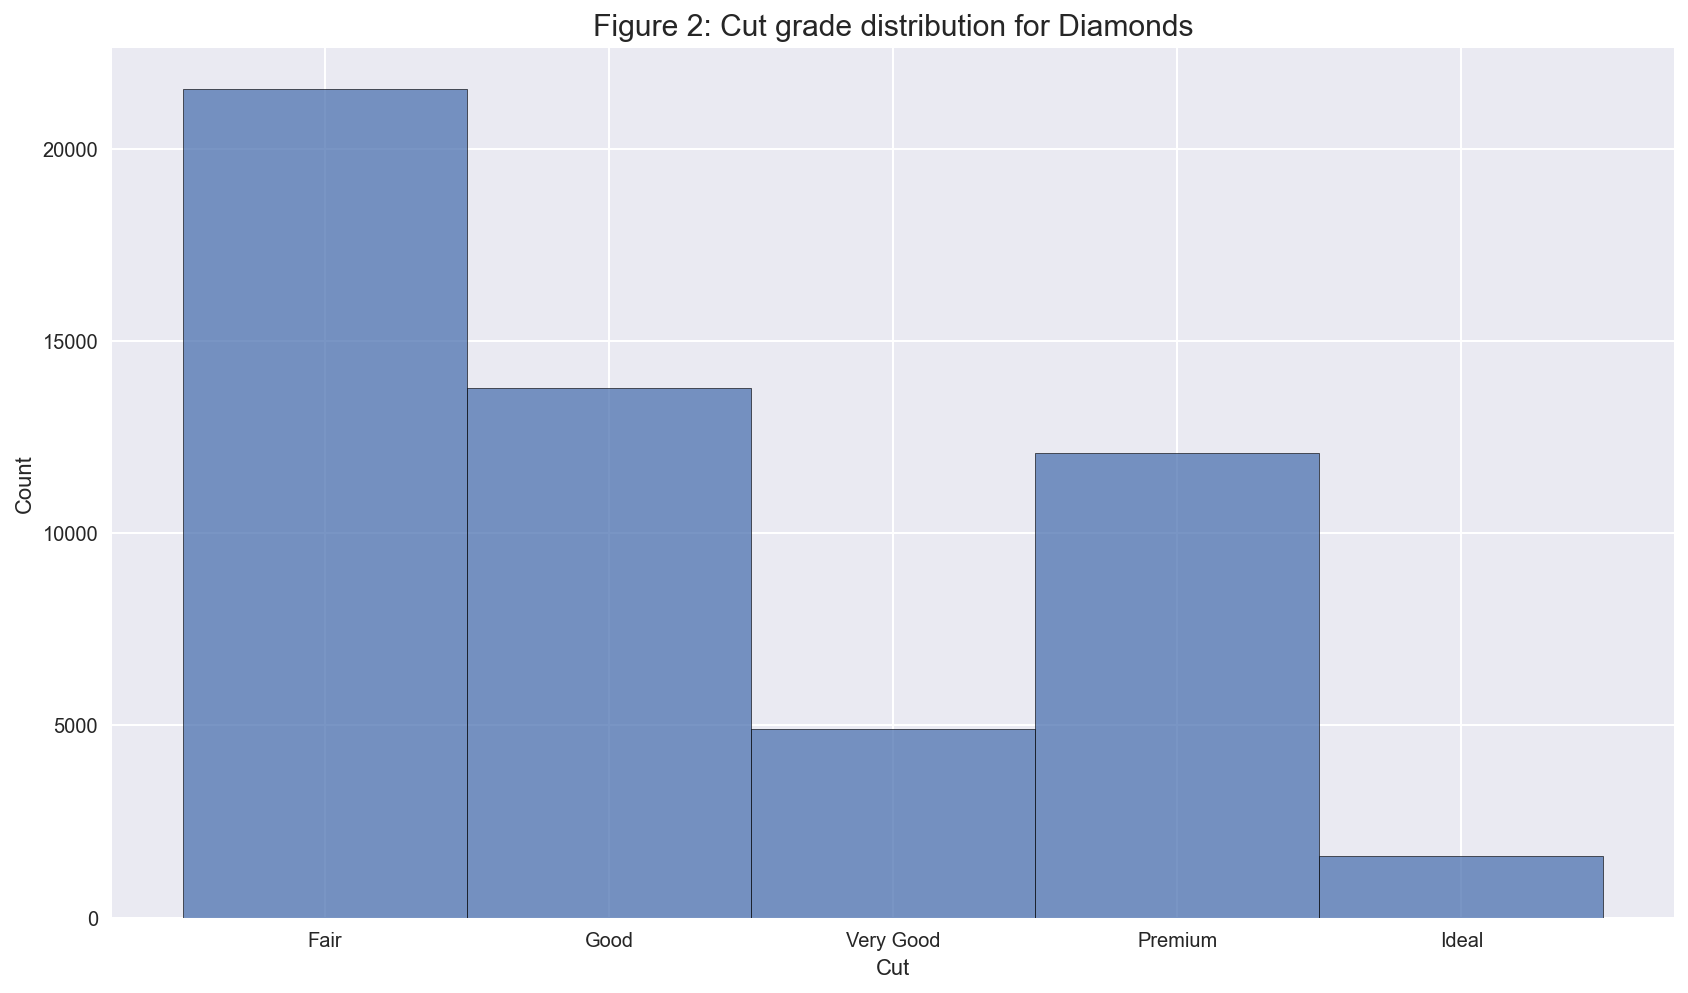

In [9]:
plt.figure(figsize = (14,8))
fig = sns.histplot(new_diamond_df['Cut'], discrete=True)
fig.set_xticks(new_diamond_df['Cut'].unique())
fig.set_xticklabels(['Fair','Good','Very Good','Premium','Ideal'])
fig = plt.title('Figure 2: Cut grade distribution for Diamonds', fontsize = 15)
plt.show()

#### Boxplot of Clarity

The boxplot demonstrates the deviation in Clarities in diamonds. From the results, we can get that Clarities of SI1, VS2, and VS1 are most common.

Boxplot legend:
- 1 -> I1 (worst)
- 2 -> SI2
- 3 -> SI1
- 4 -> VS2
- 5 -> VS1
- 6 -> VVS2
- 7 -> VVS1
- 8 -> IF (best)

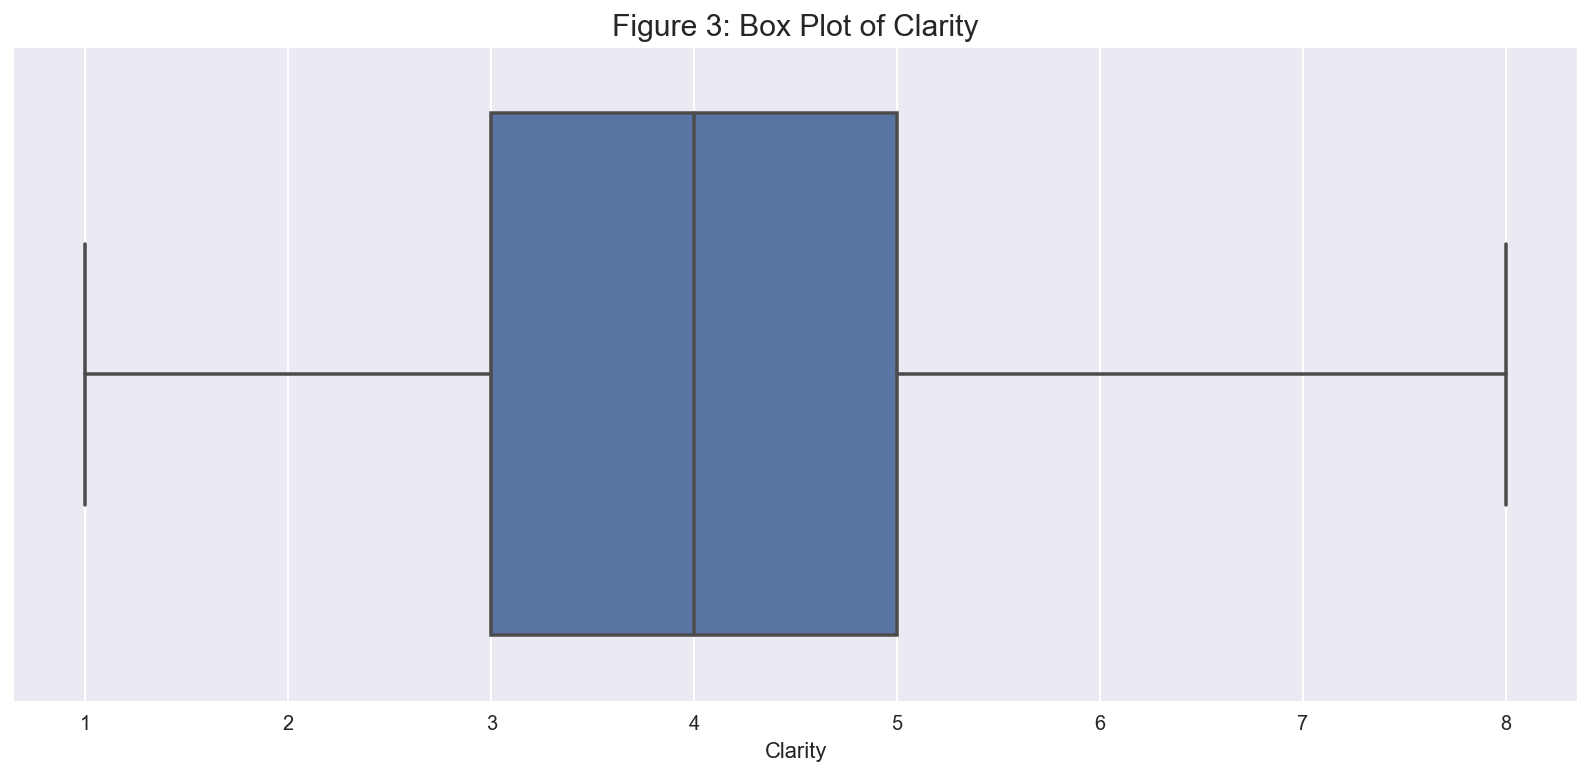

In [10]:
plt.figure(figsize = (14,6))
b1_df = new_diamond_df.copy()

b1_df.Clarity[b1_df.Clarity == 'I1'] = 1
b1_df.Clarity[b1_df.Clarity == 'SI2'] = 2
b1_df.Clarity[b1_df.Clarity == 'SI1'] = 3
b1_df.Clarity[b1_df.Clarity == 'VS2'] = 4
b1_df.Clarity[b1_df.Clarity == 'VS1'] = 5
b1_df.Clarity[b1_df.Clarity == 'VVS2'] = 6
b1_df.Clarity[b1_df.Clarity == 'VVS1'] = 7
b1_df.Clarity[b1_df.Clarity == 'IF'] = 8

fig = sns.boxplot(b1_df['Clarity']).set_title('Figure 3: Box Plot of Clarity', fontsize = 15)
plt.show()

## Summary and Conclusions

> YEEEEEEEEEEEEEEE

## References

- Agrawal, S.. Diamonds (Kaggle). Retrieved September 26, 2022 from https://www.kaggle.com/datasets/shivam2503/diamonds